In [11]:
import numpy as np
from QAM_EncoderDecoder import * 
import commpy
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
%matplotlib inline

N = 1024
prefix_no = 32
fs = 441000

## 1. Generate random symbols

In [12]:
random_symbol = np.random.randint(0,100, int(50/4))
random_symbol

array([24,  3, 50, 88, 61, 59, 72, 13,  3, 73, 50, 93])

In [13]:
bin_strings=''
for byte in random_symbol:
    binary_string = '{0:08b}'.format(byte)
    bin_strings+=binary_string
bin_strings

'000110000000001100110010010110000011110100111011010010000000110100000011010010010011001001011101'

In [14]:
symbols = encode_bitstr2symbols(bin_strings)
len(symbols)

about to do encode_bitstr2symbols encoding
encode_bitstr2symbols encoding finished


48

In [15]:
frames = np.fft.ifft(symbols)
frames.shape

(48,)

In [16]:
frames

array([ 1.25000000e-01+0.29166667j,  6.25640583e-02+0.06517797j,
       -1.34521946e-01+0.15652071j, -4.01169865e-02+0.10513899j,
       -1.15331216e-01+0.19158651j, -8.05417813e-02+0.00759327j,
       -2.94627825e-02+0.07112945j,  2.16679914e-01+0.05353657j,
       -2.44417725e-01-0.02083333j,  2.99980079e-01-0.00498269j,
        1.43886316e-01+0.14030114j, -1.92441362e-01-0.18465157j,
       -8.33333333e-02+0.33333333j,  8.69264335e-02-0.08193275j,
        7.30644609e-03-0.01175263j,  3.71199103e-02+0.07773414j,
       -3.05421959e-01+0.10416667j,  3.46732200e-01+0.08082219j,
        3.72906145e-01+0.04672168j,  1.20711086e-01-0.16529734j,
       -2.59668784e-01-0.02491984j, -2.14360894e-02-0.33187037j,
       -3.53995550e-02-0.08094507j,  1.21097892e-01-0.00893414j,
        2.91666667e-01+0.04166667j, -1.40421973e-02+0.11590808j,
        2.06864956e-02-0.18702282j, -5.33263755e-02-0.08073122j,
        1.76335450e-01-0.13058227j,  9.66245144e-02-0.00328391j,
        2.94627825e-02+0.

##  2 Convolv with a simple channel:


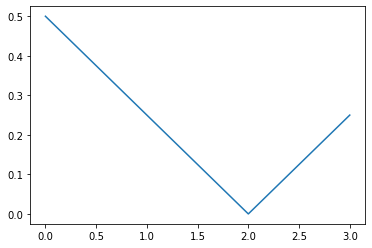

In [17]:
sim_channel = np.array([0.5, 0.25, 0.0, 0.25])
plt.plot(sim_channel)

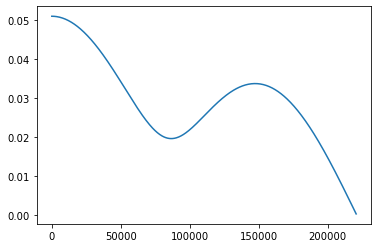

In [18]:
chan_fft = np.fft.fft(sim_channel, 1024)
chan_fft /= np.linalg.norm(chan_fft)
plt.plot(np.linspace(0,fs/2,int(N/2)),np.abs(chan_fft)[0:int(N/2)])

In [19]:
frames.shape

(48,)

In [20]:
channel_out = np.convolve(frames, sim_channel)

In [21]:
channel_out.shape

(51,)

C:\Users\11kir\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


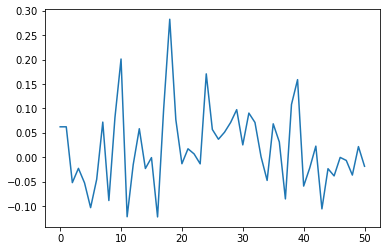

In [22]:
plt.plot(channel_out)

C:\Users\11kir\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


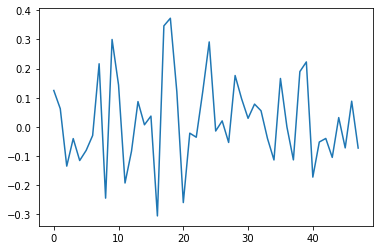

In [23]:
plt.plot(frames)

## 3. Decode the received audio

In [24]:
recorded = channel_out[0:48]
recorded.shape

(48,)

In [25]:
recorded_frequency = np.fft.fft(recorded)

In [26]:
freq_response = recorded_frequency / np.array(symbols)
freq_response

array([ 1.01341193-0.01882021j,  0.95856275-0.14150788j,
        0.93937271-0.22851941j,  0.83954176-0.34805797j,
        0.72971882-0.39629728j,  0.61670846-0.4040877j ,
        0.51547305-0.37407121j,  0.40369182-0.27371104j,
        0.39515793-0.23700532j,  0.34145795-0.113967j  ,
        0.41453314-0.08767686j,  0.46250175+0.01312448j,
        0.4709044 -0.03321321j,  0.52941992-0.05281106j,
        0.65109227-0.02684244j,  0.67409159-0.18043219j,
        0.66350551-0.26823354j,  0.54192339-0.23549032j,
        0.46622798-0.28836508j,  0.32593395-0.41242167j,
        0.30690989-0.45181666j,  0.15694993-0.24550607j,
        0.16583155-0.23299478j,  0.02121435-0.04282114j,
       -0.08518489+0.00883736j,  0.0036531 +0.04514125j,
        0.16120122+0.21577589j,  0.14030795+0.25242498j,
        0.24425532+0.30735387j,  0.3533217 +0.32312665j,
        0.54718649+0.40526549j,  0.53573267+0.34267569j,
        0.57655979+0.1820935j ,  0.58871465+0.109126j  ,
        0.5688151 +0.04604738j,

In [27]:
impulse_channel = np.fft.ifft(freq_response)
impulse_channel

array([ 4.95616071e-01-5.63198738e-03j,  2.52746110e-01+4.97664199e-03j,
        5.61754422e-03-2.83519639e-03j,  2.41422334e-01-7.89991558e-05j,
        8.59978439e-03+3.22624199e-03j, -6.69507758e-03+1.51372688e-03j,
        2.88417831e-03+1.46307893e-03j, -3.70636003e-03+1.06738068e-04j,
       -1.55496754e-03+3.61650690e-03j,  3.92115369e-03-8.55556498e-03j,
       -2.15164866e-03+6.25386772e-04j,  1.77328798e-03+6.10644818e-03j,
       -4.50065748e-03-1.19057591e-02j,  8.69863674e-03+1.06245340e-03j,
       -5.04839485e-03+3.57012926e-03j, -5.83923871e-04-5.65255757e-03j,
        1.04159600e-03-1.47693060e-03j,  2.22369177e-04-1.38701049e-03j,
        1.42340846e-03+7.66709253e-04j,  1.63771966e-03-2.34487999e-03j,
        4.42747660e-03+1.13708610e-03j, -3.53325383e-03+4.08950272e-03j,
        4.97382285e-03+7.42291992e-04j, -6.42805570e-03-2.30564951e-03j,
        8.96249998e-03-3.18664879e-03j, -1.00212321e-03+4.09423663e-03j,
        1.51083586e-03+1.95092368e-03j,  4.99255984

In [28]:
impulse_channel[0:4]

array([0.49561607-5.63198738e-03j, 0.25274611+4.97664199e-03j,
       0.00561754-2.83519639e-03j, 0.24142233-7.89991558e-05j])

In [29]:
print(np.linalg.norm(impulse_channel[0]),np.linalg.norm(impulse_channel[1]), np.linalg.norm(impulse_channel[2]), np.linalg.norm(impulse_channel[3]))

0.49564806939608974 0.2527951014429727 0.006292467055109227 0.24142234659405065


In [30]:
sim_channel

array([0.5 , 0.25, 0.  , 0.25])